In [996]:
# %pip install nbformat
# %pip install plotly
# %pip install statsmodels

In [997]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import ccf

from sklearn.model_selection import train_test_split

In [998]:
gc=pd.read_parquet('GreenhouseClimate.parquet')

In [999]:
we = pd.read_parquet('Weather.parquet')

In [1000]:
pr = pd.read_parquet('Production.parquet')

In [1001]:
pr

,%time,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB
0,43510,0.32,0.0000,NaN,45,NaN,717.0,0,0
1,43880,0.32,0.0022,1.0,45,NaN,964.0,0,0
2,43885,0.72,0.0000,0.6,47,82.0,655.0,0,0
3,43889,0.40,0.0000,1.2,48,199.0,1468.0,0,0
4,43894,0.34,0.0000,0.3,49,45.0,361.0,0,0
5,43899,0.49,0.0000,1.1,52,184.0,1398.0,0,0
6,43903,0.37,0.0000,0.4,49,56.0,437.0,0,0
7,43908,0.61,0.0000,0.9,54,134.0,1040.0,0,0
8,43913,0.46,0.0000,0.9,53,138.0,1062.2,0,0
9,43917,0.37,0.0000,0.9,50,144.0,1256.0,0,0


In [1002]:
pr.rename(columns={'%time':"Time"}, inplace = True)

In [1003]:
we.columns

Index(['%time', 'AbsHumOut', 'Iglob', 'PARout', 'Pyrgeo', 'RadSum', 'Rain',
       'Rhout', 'Tout', 'Winddir', 'Windsp'],
      dtype='object')

In [1004]:
pr

,Time,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB
0,43510,0.32,0.0000,NaN,45,NaN,717.0,0,0
1,43880,0.32,0.0022,1.0,45,NaN,964.0,0,0
2,43885,0.72,0.0000,0.6,47,82.0,655.0,0,0
3,43889,0.40,0.0000,1.2,48,199.0,1468.0,0,0
4,43894,0.34,0.0000,0.3,49,45.0,361.0,0,0
5,43899,0.49,0.0000,1.1,52,184.0,1398.0,0,0
6,43903,0.37,0.0000,0.4,49,56.0,437.0,0,0
7,43908,0.61,0.0000,0.9,54,134.0,1040.0,0,0
8,43913,0.46,0.0000,0.9,53,138.0,1062.2,0,0
9,43917,0.37,0.0000,0.9,50,144.0,1256.0,0,0


In [1005]:
# Strange columns name with special characters can cause problems sometimes
we.rename(columns={'%time': 'Time_full'}, inplace = True)

In [1006]:
res = pd.read_parquet('Resources.parquet')

In [1007]:
res.columns

Index(['%Time ', 'Heat_cons', 'ElecHigh', 'ElecLow', 'CO2_cons', 'Irr',
       'Drain'],
      dtype='object')

In [1008]:
res.rename(columns={'%Time ': 'Time'}, inplace = True)

In [1009]:

47808*5/60/24

166.0

##### the data of greenhouse conditions is for 166 days, same as Resources

In [1010]:
res.columns

Index(['Time', 'Heat_cons', 'ElecHigh', 'ElecLow', 'CO2_cons', 'Irr', 'Drain'], dtype='object')

In [1011]:
gc = gc.astype(float)

gc.rename(columns = {'%time':'Time_full'}, inplace = True)

gc['Time'] = np.floor(gc['Time_full']).astype(int)

we['Time'] = np.floor(we['Time_full']).astype(int)


In [1012]:
we

,Time_full,AbsHumOut,Iglob,PARout,Pyrgeo,RadSum,Rain,Rhout,Tout,Winddir,Windsp,Time
0,43815.00000,6.220954,0.0,0.000000e+00,-72.0,215.0,0.0,80.6,6.9,32.0,4.7,43815
1,43815.00347,6.220954,0.0,0.000000e+00,-73.0,0.0,0.0,80.6,6.9,32.0,4.7,43815
2,43815.00694,6.205565,0.0,0.000000e+00,-76.0,0.0,0.0,80.4,6.9,32.0,4.7,43815
3,43815.01042,6.190173,0.0,0.000000e+00,-77.0,0.0,0.0,80.2,6.9,32.0,4.7,43815
4,43815.01389,6.162624,0.0,0.000000e+00,-75.0,0.0,0.0,80.9,6.7,32.0,4.7,43815
...,...,...,...,...,...,...,...,...,...,...,...,...
47804,43980.98611,9.286397,0.0,9.999999e-01,-85.0,2992.0,0.0,71.4,15.1,2.0,4.3,43980
47805,43980.98958,9.242139,0.0,1.000000e+00,-85.0,2992.0,0.0,71.5,15.0,2.0,4.3,43980
47806,43980.99306,9.152067,0.0,3.350000e-08,-84.0,2992.0,0.0,70.8,15.0,2.0,3.8,43980
47807,43980.99653,9.177802,0.0,0.000000e+00,-85.0,2992.0,0.0,71.0,15.0,2.0,3.8,43980


In [1013]:
47809/(43981-43815)

288.00602409638554

Each row corresponds to 5 minute addition in the time of the date.

In [1014]:
gc['timeOfDay'] = gc['Time_full'] - gc['Time']

In [1015]:
## The last weather row is not present, but we need it for the actual conditions. So we fill the rows with ffill.
we = we.fillna(method = 'ffill')

### Understanding the problem

We need to forecast next day's heating use. Suppose purchase of the gas has to be done at midnight, then we can use the data till the last day. These conditions can be adjusted when making model for production, after obtaining complete requirements from the client.

Based on the description, we need to model the heating use based on the weather forecast of the next day and greenhouse conditions and resources consumption of the day on which we make the forecast. 




### Aggregating the values of  weather 

because energy usage is calculated at daily level

In [1016]:
we_max = we.groupby(by = 'Time').max().drop(columns = 'Time_full')
we_min = we.groupby(by = 'Time').min().drop(columns = 'Time_full')
we_mean = we.groupby(by = 'Time').mean().drop(columns = 'Time_full')

In [1017]:
we_max_min= we_max.merge(we_min, left_index = True, right_index = True, suffixes=('_max', '_min'))

In [1018]:
for col in we_mean.columns:
    we_mean.rename(columns = {col: col+'_mean'}, inplace = True )

In [1019]:
we_stats = we_max_min.merge(we_mean, left_index = True, right_index = True)

### Correlations

Checking linear correlations of Heat_cons with other columns and selecting the columns which have abs correlation > 0.4 .

In [1020]:
corr = we_stats.corr()

In [1021]:
plt.figure(figsize = (20,20))
px.imshow(corr)

<Figure size 2000x2000 with 0 Axes>

The min, max and mean of each weather feature are highly correlated with each other, so keeping only mean of the day should be sufficient in the model. To be more accurate, we should do a PCA of the weather features statistics.

#### Merging Resources data with weather.

If we want to use the resources data of the current day to forecast the next day's heat consumption, we should shift the columns by 1 day.

In [1022]:
res[['ElecHigh','ElecLow', 'CO2_cons', 'Irr', 'Drain']] = res[['ElecHigh','ElecLow', 'CO2_cons', 'Irr', 'Drain' ]].shift(1)

In [1023]:
res = res.merge(we_stats, left_on = 'Time', right_index = True )

In [1024]:
corr_res_we = res.corr()


In [1025]:
corr_res_we[(corr_res_we['Heat_cons']>0.3) | (corr_res_we['Heat_cons']<-0.3)]['Heat_cons']

Time          -0.523653
Heat_cons      1.000000
ElecHigh       0.671992
ElecLow        0.596032
Iglob_max     -0.603790
PARout_max    -0.608813
Pyrgeo_max     0.340583
RadSum_max    -0.644390
Rhout_max      0.340029
Tout_max      -0.721965
Windsp_max     0.355348
Pyrgeo_min     0.425598
Rhout_min      0.482260
Tout_min      -0.548027
Winddir_min    0.326919
Windsp_min     0.341201
Iglob_mean    -0.645145
PARout_mean   -0.654691
Pyrgeo_mean    0.458327
RadSum_mean   -0.636686
Rain_mean      0.360535
Rhout_mean     0.432313
Tout_mean     -0.703504
Windsp_mean    0.415372
Name: Heat_cons, dtype: float64

In [1026]:
px.imshow(corr_res_we)

### Aggregating greenhouse conditions to daily values

In [1027]:
# Remoing the columns with more than 20% null columns and filling the rest with ffill and bfill

gc_nullcount = gc.isna().sum()/len(gc)
drop_columns = gc_nullcount[gc_nullcount > 0.2].index
gc.drop(columns = drop_columns, inplace = True)

In [1028]:
gc.fillna(method = 'bfill', inplace = True)

In [1029]:
gc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47809 entries, 0 to 47808
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time_full                    47809 non-null  float64
 1   AssimLight                   47808 non-null  float64
 2   BlackScr                     47808 non-null  float64
 3   CO2air                       47808 non-null  float64
 4   Cum_irr                      47808 non-null  float64
 5   EC_drain_PC                  47808 non-null  float64
 6   EnScr                        47808 non-null  float64
 7   HumDef                       47808 non-null  float64
 8   PipeGrow                     47808 non-null  float64
 9   PipeLow                      47808 non-null  float64
 10  Rhair                        47808 non-null  float64
 11  Tair                         47808 non-null  float64
 12  Tot_PAR                      47808 non-null  float64
 13  Tot_PAR_Lamps   

In [1030]:
gc = gc.iloc[:-1]

ALl the null values have been filled except for the last row.

In [1031]:
## For aggregation, sum or the max of the features can be relevant for different features.
## Of some features, their sum over the day is required (like for assimilation light, Tot PAR, Tot_PAR_Lamps, Water_sup) 
## and for some, their max value can have effect on the heating (like Tair, CO2, Pipe etc)
gc_group = gc.groupby(by = 'Time')
gc_sum = gc_group.sum()
gc_max = gc_group.max()

In [1032]:
gc_stats = gc_max.merge(gc_sum, left_index = True, right_index = True, suffixes = ('_max', '_sum'))

#### Same as resources data, we should shift the greenhous conditions by 1 day because we cannot forecast all of them for the next day.

In [1033]:
gc_stats.drop(columns=['Time_full_max', 'Time_full_sum'], inplace=True)

In [1034]:
gc_stats = gc_stats.shift(1)

### Correlations between Heat and Greenhouse conditions

In [1035]:
res = res.merge(gc_stats, left_on = 'Time', right_index = True )

In [1036]:
### Checking out the produce data

res = res.merge(pr, left_on = "Time", right_on = "Time", how = "left")

In [1037]:
res

,Time,Heat_cons,ElecHigh,ElecLow,CO2_cons,Irr,Drain,AbsHumOut_max,Iglob_max,PARout_max,...,window_pos_lee_vip_sum,timeOfDay_sum,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB
0,43815,2.19,NaN,NaN,NaN,NaN,NaN,8.273792,81.999998,169.999997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43816,0.92,0.7,0.0,0.009824,0.2,0.0,9.466982,212.999997,496.999975,...,345.6,143.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,43817,1.26,0.8,0.6,0.015908,0.0,0.0,7.720044,221.999999,467.999999,...,345.6,143.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,43818,0.75,0.9,0.6,0.014698,0.0,0.0,9.559278,195.999998,487.999994,...,345.6,143.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,43819,0.84,0.8,0.6,0.023630,0.1,0.0,10.211316,98.999995,201.999998,...,345.6,143.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,43976,0.87,0.0,0.0,0.024418,3.4,2.2,9.911988,952.999997,1916.999996,...,540.0,143.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,43977,1.03,0.0,0.0,0.051433,2.3,0.1,9.921453,921.999999,1867.999998,...,540.0,143.5,0.97,0.0,1.1,41.0,98.0,936.0,0.0,0.0
163,43978,0.56,0.0,0.0,0.041604,2.2,0.0,9.831553,978.000000,1983.999980,...,540.0,143.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,43979,0.95,0.0,0.0,0.057403,2.2,0.0,8.056937,909.999999,1784.999999,...,540.0,143.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1038]:
fig = px.scatter(x=res["Heat_cons"], y = res["Weight_fruits_ClassA"]/50)
fig.show()

There appears to be no linear correlation between the produce data and heating consumption, but we keep it in case there is any interaction effect with other variables.

In [1039]:
fig = px.scatter()
fig.add_scatter( x=res.Time, y=res["Tout_max"], name = "Tout_mean")
fig.add_scatter( x=res.Time, y=res["Heat_cons"], name = "Heat_cons")
fig.add_scatter( x=res.Time, y=res["Tair_max"], name = "Tair_mean")
fig.add_scatter( x=res.Time, y=res["Iglob_max"]/20, name = "Iglob_mean")
fig.add_scatter( x=res.Time, y=res["RadSum_max"]/200, name = "RadSum_max")
fig.add_scatter( x=res.Time, y=res["Rhair_max"]/10, name = "Rhair_mean")
fig.add_scatter( x=res.Time, y=res["Rhout_max"]/10, name = "Rhout_mean")
fig.add_scatter( x=res.Time, y=res["AssimLight_sum"]/1000, name = "AssimLight_sum")

fig.show()

The above plots give show that:

    - The Inner temperatture is maintained between 22 to 24.
    
    - As the outer temperature increases, heat consumption generally decreases.
    
    - RadSum_max has a smoother trend than Iglob_mean, and is inversely related to the heat_cons.
    
    - The HPS lighting also generate lot of heat. They would be switched on when the RadSum is low. So, the interplay between Iglob and duration of assim light in the greenhouse, should be captured in the Tair_mean, Tout_mean and RadSum_max, but it should be thoroughly verified.

In [1040]:
corr_res = res.corr()

In [1041]:
px.imshow(corr_res)

In [1042]:
corr_res[(corr_res['Heat_cons']>0.5) | (corr_res['Heat_cons']<-0.5)]['Heat_cons']

Time                      -0.523653
Heat_cons                  1.000000
ElecHigh                   0.671992
ElecLow                    0.596032
Iglob_max                 -0.603790
PARout_max                -0.608813
RadSum_max                -0.644390
Tout_max                  -0.721965
Tout_min                  -0.548027
Iglob_mean                -0.645145
PARout_mean               -0.654691
RadSum_mean               -0.636686
Tout_mean                 -0.703504
AssimLight_max             0.549708
BlackScr_max               0.534317
HumDef_max                -0.581880
PipeLow_max                0.620009
Tot_PAR_Lamps_max          0.563443
assim_sp_max               0.557205
assim_vip_max              0.549708
scr_blck_sp_max            0.620036
t_heat_sp_max              0.807718
t_heat_vip_max             0.807818
t_vent_sp_max              0.807129
t_ventlee_vip_max          0.815083
t_ventwind_vip_max         0.635466
window_pos_lee_sp_max     -0.666248
window_pos_lee_vip_max    -0

Several features have a high correlation with Heat_cons.

In [1043]:
# Scatter plot between AssimLight and Iglob
px.scatter(res, y = "Heat_cons", x = "RadSum_max")

In [1044]:
# Scatter plot between AssimLight and RadSum

px.scatter(res, x = "Tout_max", y = "Heat_cons")

### Plotting cross correlation between Heat_cons and Tout_mean, RadSum_max

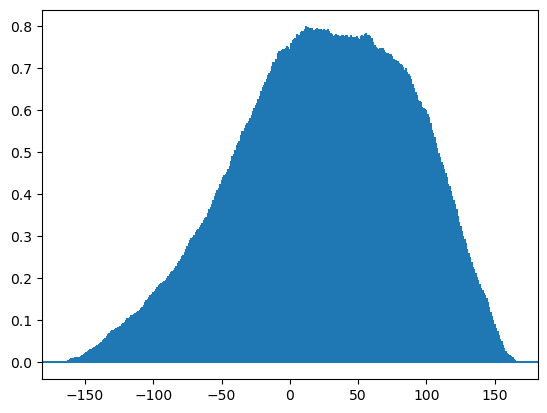

In [1045]:
plt.xcorr(res['Tout_max'],res['Heat_cons'],  normed=True, usevlines=True, maxlags=165)
plt.show()


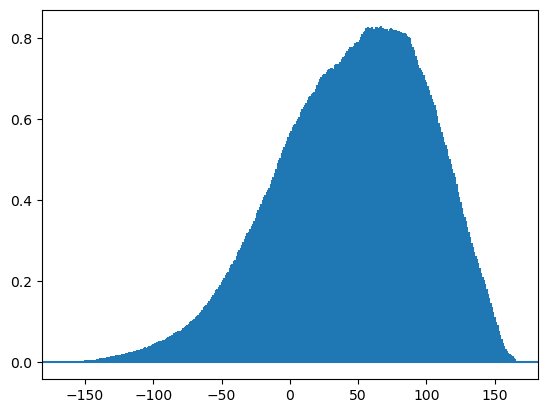

In [1046]:
plt.xcorr(res['RadSum_max'],res['Heat_cons'],  normed=True, usevlines=True, maxlags=165)

plt.show()

In [1047]:
# Scatter plot between AssimLight and Iglob
fig = px.scatter(y = res["Heat_cons"], x = res["Tout_max"].shift(10))
fig.show()

In [1048]:
# Scatter plot between AssimLight and Iglob
fig = px.scatter(y = res["Heat_cons"], x = res["RadSum_max"].shift(60))
fig.show()

Feels a bit difficult to deduce how time lagged Tout or RadSum are correlated with Heat_cons based on such short duration of data. So, I am keeping only the instantatneous Temp and Radiation. 

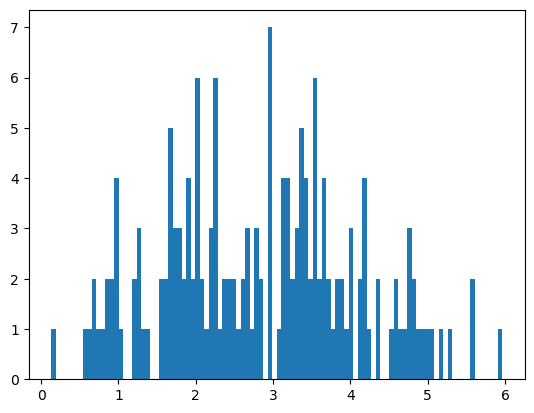

In [1049]:
plt.hist(res['Heat_cons'], bins=100)
plt.show()

array([[<Axes: title={'center': 'Heat_cons'}>,
        <Axes: title={'center': 'Tout_mean'}>],
       [<Axes: title={'center': 'Iglob_max'}>, <Axes: >]], dtype=object)

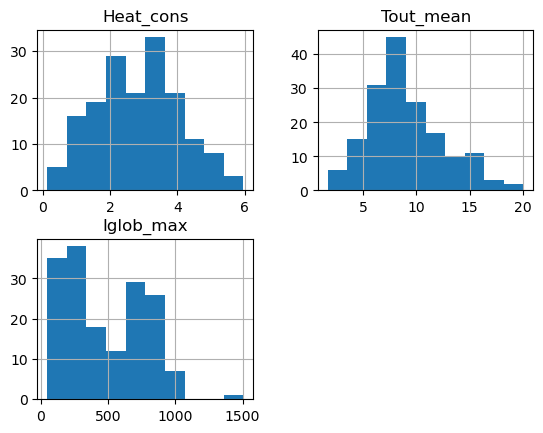

In [1050]:
res.iloc[:][['Heat_cons', 'Tout_mean', "Iglob_max"]].hist()

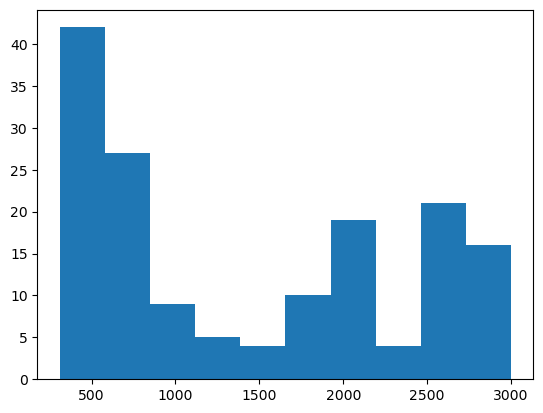

In [1051]:
plt.hist(res["RadSum_max"].rolling(10).max())
plt.show()

### Create some more features

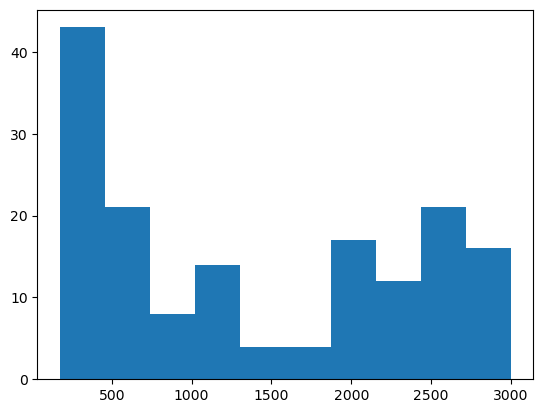

In [1052]:
plt.hist(res["RadSum_max"].rolling(7).max())
plt.show()

##### RadSum_max is bimodal, so it is important to split the data system into different modes and make 2 models. But skipping it for this time

In [1053]:
# Take the max of past 10 days max RadSum to get a sense of in which season we are. 

res["RadSum_season"] = res["RadSum_max"].rolling(10).max()

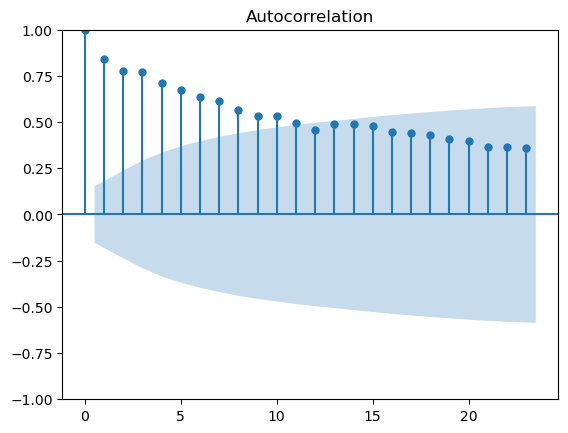

C:\Users\dmehta\AppData\Local\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



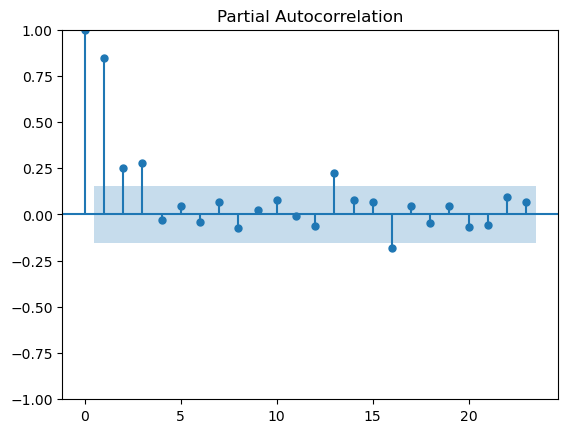

In [1054]:
plot_acf(res.iloc[:-1]['Heat_cons'])
plt.show()
plot_pacf(res.iloc[:-1]['Heat_cons'])
plt.show()

Heat consumption is highly correlated with its previous day's value as seen in the partial autocorrelation plot. This is being measured at the end of the day, so the previous day's value of Heat_cons can be used as a feature.

In [1055]:
res['Heat_cons_past'] =res['Heat_cons'].shift(1)

## Model selection

Now we have the ingredients: Heat_cons, RadSum_season and Iglob, Tout. So, we can make a model. I would choose either a linear regression or decision tree in this POC.

The dataset has only 166 rows, so we should restrict the features to a small number too.


In [1056]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.api import OLS 
from sklearn.metrics import mean_squared_error

from sklearn.decomposition import PCA

In [1057]:
list(res.columns)

['Time',
 'Heat_cons',
 'ElecHigh',
 'ElecLow',
 'CO2_cons',
 'Irr',
 'Drain',
 'AbsHumOut_max',
 'Iglob_max',
 'PARout_max',
 'Pyrgeo_max',
 'RadSum_max',
 'Rain_max',
 'Rhout_max',
 'Tout_max',
 'Winddir_max',
 'Windsp_max',
 'AbsHumOut_min',
 'Iglob_min',
 'PARout_min',
 'Pyrgeo_min',
 'RadSum_min',
 'Rain_min',
 'Rhout_min',
 'Tout_min',
 'Winddir_min',
 'Windsp_min',
 'AbsHumOut_mean',
 'Iglob_mean',
 'PARout_mean',
 'Pyrgeo_mean',
 'RadSum_mean',
 'Rain_mean',
 'Rhout_mean',
 'Tout_mean',
 'Winddir_mean',
 'Windsp_mean',
 'AssimLight_max',
 'BlackScr_max',
 'CO2air_max',
 'Cum_irr_max',
 'EC_drain_PC_max',
 'EnScr_max',
 'HumDef_max',
 'PipeGrow_max',
 'PipeLow_max',
 'Rhair_max',
 'Tair_max',
 'Tot_PAR_max',
 'Tot_PAR_Lamps_max',
 'VentLee_max',
 'Ventwind_max',
 'assim_sp_max',
 'assim_vip_max',
 'co2_dos_max',
 'co2_sp_max',
 'co2_vip_max',
 'dx_sp_max',
 'dx_vip_max',
 'int_blue_sp_max',
 'int_farred_sp_max',
 'int_red_sp_max',
 'int_white_sp_max',
 'pH_drain_PC_max',
 'scr_b

In [1058]:
res_model = res[['Heat_cons', 'Tout_mean', 'RadSum_season', 'RadSum_max', 'Iglob_max', 'Heat_cons_past']]

By keeping columns of past value, we don't need to care about the order of sequence any more. so we can take a random sample for train and validate. Here, I am making a model using the actual Iglob value because in the historic data we have that. In production, the forecsast of weather can be used. 

In [1059]:
res_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 165
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Heat_cons       166 non-null    float64
 1   Tout_mean       166 non-null    float64
 2   RadSum_season   157 non-null    float64
 3   RadSum_max      166 non-null    float64
 4   Iglob_max       166 non-null    float64
 5   Heat_cons_past  165 non-null    float64
dtypes: float64(6)
memory usage: 9.1 KB


In [1060]:
res_model = res_model.iloc[10:]


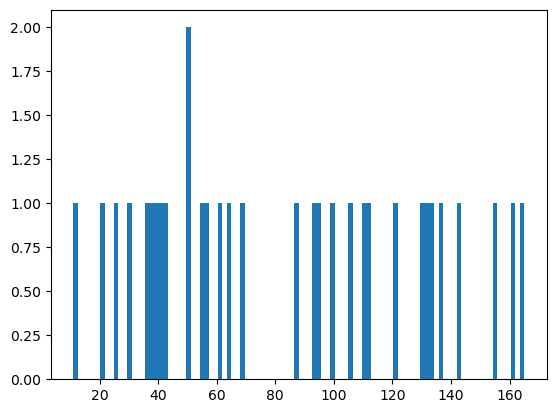

In [1061]:
#create our X and y

X = res_model.drop(['Heat_cons'], axis=1)
y = res_model['Heat_cons']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 100)
# checking if the test sample was taken uniformly from everywhere. 
plt.hist(y_test.index, bins=100)
plt.show()

The sampling is pretty uniform across time.

In [1062]:
scalery = MinMaxScaler()
y_train_scaled = scalery.fit_transform(y_train.to_numpy().reshape(-1,1))


In [1063]:
poly = PolynomialFeatures(degree=2, include_bias = False)

X_train_poly = poly.fit_transform(X_train)



In [1064]:
poly.get_feature_names_out()

array(['Tout_mean', 'RadSum_season', 'RadSum_max', 'Iglob_max',
       'Heat_cons_past', 'Tout_mean^2', 'Tout_mean RadSum_season',
       'Tout_mean RadSum_max', 'Tout_mean Iglob_max',
       'Tout_mean Heat_cons_past', 'RadSum_season^2',
       'RadSum_season RadSum_max', 'RadSum_season Iglob_max',
       'RadSum_season Heat_cons_past', 'RadSum_max^2',
       'RadSum_max Iglob_max', 'RadSum_max Heat_cons_past', 'Iglob_max^2',
       'Iglob_max Heat_cons_past', 'Heat_cons_past^2'], dtype=object)

In [1065]:
import prince

In [1066]:
pca = prince.PCA( n_components=4,n_iter=3,rescale_with_mean=True,rescale_with_std=True,copy=True,check_input=True,engine='sklearn',random_state=42)
X_train_pca = pca.fit_transform(pd.DataFrame(X_train_poly))


In [1067]:
pca.percentage_of_variance_

array([70.89736296, 14.22291749,  7.55609413,  3.07506199])

In [1068]:
pca.column_correlations

component,0,1,2,3
variable,,,,
0,0.744349,-0.425012,-0.497020,-0.069366
1,0.969450,0.106951,0.054244,-0.158128
2,0.977165,0.093322,0.083349,-0.100134
3,0.914236,0.281660,0.002417,0.253149
4,-0.851922,0.358027,-0.269267,0.103553
5,0.744404,-0.474498,-0.433250,-0.034200
6,0.944999,-0.225997,-0.166803,-0.073873
7,0.948433,-0.226812,-0.134939,-0.035954
8,0.942476,-0.122260,-0.207351,0.170675


 The first 4 components ofthe PCA summarise 0.96 of the total variance in the data, so we keep them only.

In [1069]:
pca.column_contributions_

component,0,1,2,3
variable,,,,
0,0.039074,6.350143e-02,0.163463,0.007824
1,0.066281,4.021145e-03,0.001947,0.040657
2,0.067340,3.061635e-03,0.004597,0.016304
3,0.058946,2.788887e-02,0.000004,0.104200
4,0.051185,4.506225e-02,0.047978,0.017436
5,0.039080,7.915001e-02,0.124208,0.001902
6,0.062980,1.795513e-02,0.018411,0.008873
7,0.063439,1.808483e-02,0.012049,0.002102
8,0.062644,5.254736e-03,0.028450,0.047365


In [1070]:

X_train_pca = sm.add_constant(X_train_pca)

In [1071]:
# Do L1 regularisatiom to drop the columns that have very small coefficient or have very high error in their coefficients.
# Do L2 regularisation to reduce some features to get very high  coefficient
model = OLS(y_train_scaled, X_train_pca)
results= model.fit()

print(results.summary())
print(results.params)
# print(results.tvalues)
# Find the RMSE in training data
print('RMSE of training set: ', mean_squared_error(y_train_scaled[:,0], results.predict(X_train_pca), squared = False))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     112.7
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           1.60e-39
Time:                        13:20:53   Log-Likelihood:                 118.85
No. Observations:                 124   AIC:                            -227.7
Df Residuals:                     119   BIC:                            -213.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4770      0.009     56.071      0.0

In [1072]:
results_reg = model.fit_regularized(alpha=0.3, L1_wt = 0.01) # Setting the L2 and L1 penalties
results_reg.params

const    0.365434
0       -0.045467
1        0.021631
2        0.001793
3        0.000000
dtype: float64

In [1073]:
X_test_scaled = pca.transform(pd.DataFrame(poly.transform(X_test)))
X_test_scaled = sm.add_constant(X_test_scaled)

y_test_scaled = scalery.transform(y_test.to_numpy().reshape(-1,1))[:, 0]

print('RMSE of test set: ', mean_squared_error(y_test_scaled, results.predict(X_test_scaled), squared = False))

RMSE of test set:  0.11599201951858429


The training and test RMSE are both about 10%, which means the model is not overfitting to the training set.

The Heat_cons may not be a linear function of the given features.

Some non linear models should be tried, or some more features to be added.

### Error analysis

In [1074]:
y_pred = results.predict(X_test_scaled)

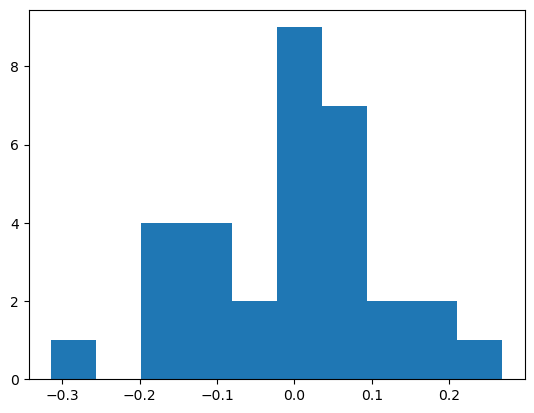

In [1075]:
plt.hist(y_pred-y_test_scaled)
plt.show()

In [1076]:
df_results = X_test.merge(y_test, left_index=True, right_index= True)

In [1077]:
df_results['pred'] = scalery.inverse_transform(y_pred.to_numpy().reshape(-1, 1))

In [1078]:
df_results['error'] = (df_results['pred'] - df_results['Heat_cons'])/df_results['Heat_cons']

In [1079]:
fig = px.scatter()
fig.add_scatter( x = df_results["Heat_cons"], y=df_results.error, name = "Error vs Heat_Cons", mode='markers')
fig.add_scatter( x = df_results["Heat_cons"], y=df_results.pred, name = "predictions vs Heat_cons", mode='markers')

fig.show()

The model is underestimating the Heat when the consumption is higher. 

The temperature outside has a high variance in the region when there is high heat.

Perhaps, that extra heating use is not being explained by the current features. 

Or may be in the hotter days, there is absorbed heat inside the greenhouse, which is absent in the colder days. So, more heat is needed than calculated by the present day's weather data. Perhaps some time lagged values of weather play a role. Or, there are totally other factors, not taken into account like vent opening etc.

### Model using all the features and PCA


The approach here is to take all the columns and find their PCA and then apply polynomial features on them.

In [1080]:
#Since we time shifted the greenhouse and resources data by  1 day, we delete the first row.

res = res.iloc[1:]

In [1081]:
pr

,Time,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB
0,43510,0.32,0.0000,NaN,45,NaN,717.0,0,0
1,43880,0.32,0.0022,1.0,45,NaN,964.0,0,0
2,43885,0.72,0.0000,0.6,47,82.0,655.0,0,0
3,43889,0.40,0.0000,1.2,48,199.0,1468.0,0,0
4,43894,0.34,0.0000,0.3,49,45.0,361.0,0,0
5,43899,0.49,0.0000,1.1,52,184.0,1398.0,0,0
6,43903,0.37,0.0000,0.4,49,56.0,437.0,0,0
7,43908,0.61,0.0000,0.9,54,134.0,1040.0,0,0
8,43913,0.46,0.0000,0.9,53,138.0,1062.2,0,0
9,43917,0.37,0.0000,0.9,50,144.0,1256.0,0,0


In [1082]:
pr.columns

Index(['Time', 'ProdA', 'ProdB', 'avg_nr_harvested_trusses',
       'Truss development time ', 'Nr_fruits_ClassA', 'Weight_fruits_ClassA',
       'Nr_fruits_ClassB', 'Weight_fruits_ClassB'],
      dtype='object')

In [1083]:

res_model = res.drop(columns=['Time'])



In [1084]:
res_model.head(12)

,Heat_cons,ElecHigh,ElecLow,CO2_cons,Irr,Drain,AbsHumOut_max,Iglob_max,PARout_max,Pyrgeo_max,...,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB,RadSum_season,Heat_cons_past
1,0.92,0.7,0.0,0.009824,0.2,0.0,9.466982,212.999997,496.999975,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.19
2,1.26,0.8,0.6,0.015908,0.0,0.0,7.720044,221.999999,467.999999,-3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.92
3,0.75,0.9,0.6,0.014698,0.0,0.0,9.559278,195.999998,487.999994,-7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.26
4,0.84,0.8,0.6,0.023630,0.1,0.0,10.211316,98.999995,201.999998,-4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.75
5,0.92,1.4,0.6,0.021622,0.1,0.0,7.783027,119.999998,255.999997,-4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.84
6,1.00,1.5,0.9,0.026619,0.3,0.0,8.910617,83.999999,170.999998,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.92
7,1.34,1.5,0.9,0.028086,0.3,0.0,8.145069,165.999995,390.999992,-8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
8,2.02,1.5,0.9,0.038608,0.2,0.0,8.923261,132.999995,283.999989,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.34
9,2.23,1.5,0.9,0.031676,0.8,0.0,8.544441,190.999997,411.999995,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,313.0,2.02
10,3.10,1.5,0.9,0.028252,1.4,0.0,7.399868,55.000000,107.000000,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,313.0,2.23


In [1085]:

# FIlling the unkonwn data for produce as 0 because when there is no haervest, it is = 0.
res_model[['ProdA', 'ProdB', 'avg_nr_harvested_trusses', 'Nr_fruits_ClassA', 'Weight_fruits_ClassA', \
           'Nr_fruits_ClassB', 'Weight_fruits_ClassB' ]] = res_model[['ProdA', 'ProdB', 'avg_nr_harvested_trusses', 'Nr_fruits_ClassA', 'Weight_fruits_ClassA', \
           'Nr_fruits_ClassB', 'Weight_fruits_ClassB' ]].fillna(0)

# Dropping the column truss development time because we cannot fill it in when there is no harvest.
res_model.drop(columns=['Truss development time '], inplace =True)

# Dropping the initial rows for which RadSum_season is not known
res_model = res_model[8:]

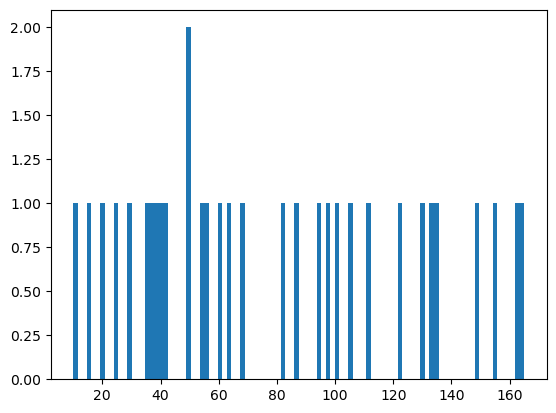

In [1086]:
# Train and validation split

X_train, X_test, y_train, y_test = train_test_split(res_model.drop(columns=['Heat_cons']), res_model['Heat_cons'], test_size=0.2, random_state = 100)
# checking if the test sample was taken uniformly from everywhere. 
plt.hist(y_test.index, bins=100)
plt.show()

In [1087]:
pca = prince.PCA( n_components=10,n_iter=3,rescale_with_mean=True,rescale_with_std=True,copy=True,check_input=True,engine='sklearn',random_state=42)
X_train_pca = pca.fit_transform(X_train)

In [1088]:
pca.column_correlations

component,0,1,2,3,4,5,6,7,8,9
variable,,,,,,,,,,
ElecHigh,-0.934484,-0.100216,0.053849,-0.116647,0.037923,-0.018363,0.002334,0.017131,0.010732,0.127364
ElecLow,-0.748920,-0.522427,0.260114,-0.247123,0.021875,0.069066,0.023992,-0.056958,-0.002666,0.033663
CO2_cons,0.563329,-0.622138,0.157576,-0.286880,-0.018621,-0.037912,0.036494,-0.092879,-0.061414,-0.267808
Irr,0.462351,-0.778745,-0.244451,0.108223,0.101481,-0.029999,-0.134095,0.069460,-0.014686,-0.107379
Drain,0.262779,-0.711572,-0.146174,0.267549,0.139573,-0.026120,-0.230845,0.117091,-0.005936,-0.079777
...,...,...,...,...,...,...,...,...,...,...
Weight_fruits_ClassA,0.184651,-0.135083,-0.012855,0.374534,0.127776,0.846770,0.204392,-0.087464,0.040022,0.040306
Nr_fruits_ClassB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight_fruits_ClassB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1089]:
pca.percentage_of_variance_

array([38.08604209, 19.16935641,  7.97517251,  5.315049  ,  3.65143519,
        3.28560523,  2.66361534,  2.14755188,  1.59650681,  1.50178189])

Since there are such high number of variables, top 10 pca components summarise 90% of the variance in the data, so we use them as the featuers

In [1090]:
y_train_scaled = scalery.fit_transform(y_train.to_numpy().reshape(-1,1))

In [1091]:
X_train_pca = sm.add_constant(X_train_pca)

In [1092]:
model = OLS(y_train_scaled, X_train_pca)
# results = model.fit_regularized(alpha=0.07, L1_wt = 0.001) # Setting the L2 and L1 penalties
results = model.fit() # Setting the L2 and L1 penalties

print(results.params)


# Find the RMSE in training data
print('RMSE of training set: ', mean_squared_error(y_train_scaled[:,0], results.predict(X_train_pca), squared = False))


const    0.472110
0       -0.026677
1       -0.006226
2       -0.005418
3        0.010099
4       -0.016298
5       -0.002359
6        0.004736
7        0.008199
8        0.004195
9       -0.030565
dtype: float64
RMSE of training set:  0.07678746515534435


### Calcultion of 95% confidence interval  of the forecast.

From the below ranges of the coefficients of the varaibles of the linear regression model, we can compute the range of the forecast with 95% confidence.

In [1093]:
print(results.conf_int())


              0         1
const  0.457863  0.486357
0     -0.028839 -0.024514
1     -0.009274 -0.003179
2     -0.010143 -0.000693
3      0.004311  0.015886
4     -0.023281 -0.009315
5     -0.009721  0.005002
6     -0.003440  0.012911
7     -0.000907  0.017304
8     -0.006366  0.014755
9     -0.041453 -0.019676


In [1094]:

X_test_scaled = pca.transform(pd.DataFrame(X_test))
X_test_scaled = sm.add_constant(X_test_scaled)

y_test_scaled = scalery.transform(y_test.to_numpy().reshape(-1,1))[:, 0]

print('RMSE of test set: ', mean_squared_error(y_test_scaled, results.predict(X_test_scaled), squared = False))

RMSE of test set:  0.11991356018965911


There is not improvement in the training and test RMSE with this approach too. 

## Let's try Gradient boosted tree

The values of the heating and and those of the greenhouse conditions and weather, all fall within a range, so decision tree may still be a good choice because it can capture the non-linearities.

In [1095]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [1097]:
X_train_pca.columns = X_train_pca.columns.astype(str)

In [1098]:
gb_reg = GradientBoostingRegressor(random_state=0)
gb_reg.fit(X_train_pca, y_train_scaled)

C:\Users\dmehta\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GradientBoostingRegressor(random_state=0)

In [1099]:
X_test_scaled.columns = X_test_scaled.columns.astype(str)

In [1100]:
print("R2 value on training set: ", gb_reg.score(X_train_pca, y_train_scaled))

R2 value on training set:  0.994402235069828


In [1101]:
print("R2 value on validation set: ",gb_reg.score(X_test_scaled, y_test_scaled))

R2 value on validation set:  0.7708891945749228


### Error margin in the forecast

It can be calculated using mean percentage error in case of decision tree.

In [1102]:
mean_absolute_percentage_error(y_test_scaled, gb_reg.predict(X_test_scaled))

0.1711399685264427

17% average error in the predictions in this model

## Conclusion

- Based on the heat consumption, the gas consumption can be computed, but since the calorific value of the gas is not known, I would leave that for later. Past data of actual gas consumption should be used to forecast the gas use accurately. 

- The decision tree managed to overfit on the training data, which is what decesion trees are good at. 

- With hyperparameter tuning, we can obtain a better performance from the decision tree.

